In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sympy as sp
%matplotlib notebook

In [14]:
# Поворот стрелки относительно своей оси
def Rot2D(X, Y, Alpha):
    RotX = X*np.cos(Alpha) - Y*np.sin(Alpha)
    RotY = X*np.sin(Alpha) + Y*np.cos(Alpha)
    return RotX, RotY

In [15]:
# Итеративная перерисовка графика 
def TheMagicOfThtMovement(i):
    P.set_data(x[i], y[i])
    V_line.set_data([x[i], x[i]+k_V*Vx[i]],[y[i], y[i]+k_V*Vy[i]]) 
    RotX, RotY = Rot2D(x_arr, y_arr, Alpha_V[i])
    V_Arrow.set_data(x[i]+k_V*Vx[i] + RotX, y[i]+k_V*Vy[i] + RotY)
    A_line.set_data([x[i], x[i]+k_A*Ax[i]],[y[i], y[i]+k_A*Ay[i]]) 
    RotX, RotY = Rot2D(x_arr, y_arr, Alpha_A[i])
    A_Arrow.set_data(x[i]+k_A*Ax[i] + RotX, y[i]+k_A*Ay[i] + RotY)
    R_Line.set_data([x[i], x[i]+Nx[i]*R[i]], [y[i], y[i]+Ny[i]*R[i]])
    Centr.set_data(x[i]+R[i]*Nx[i]+R[i]*np.cos(angle), y[i]+R[i]*Ny[i]+R[i]*np.sin(angle))
    return [P, V_line, V_Arrow, A_line, A_Arrow, R_Line, Centr]

In [16]:
t = sp.Symbol('t')

r = 2+sp.sin(6*t) # Так задаётся радиальная координата
phi = 6.5*t+1.2*sp.cos(6*t) # Так задаётся угловая координата
k_V = 0.3 # Масштабирование длины вектора скорости
k_A = 0.03 # Масштабирование длины вектора ускорения
a=0.1 # "Длина" стрелки
b=0.05 # "Ширина" стрелки
ite = np.linspace(0, 10, 3001)
x_arr = np.array([-a, 0, -a])
y_arr = np.array([b, 0, -b])

In [17]:
# Переход в декартову систему координат
x = r*sp.cos(phi)
y = r*sp.sin(phi)

In [18]:
# Получение новых функций
Vx = sp.diff(x, t)
Vy = sp.diff(y, t)
Ax = sp.diff(Vx, t)
Ay = sp.diff(Vy, t)
v = sp.sqrt(Vx**2+Vy**2)
At = sp.diff(v, t)
An = (sp.sqrt((Ax**2 + Ay**2) - At**2))
R = v**2 / An
eVx = Vx / v
eVy = Vy / v
Atx = eVx * At
Aty = eVy * At
Anx = Ax - Atx
Any = Ay - Aty
Nx = Anx / An
Ny = Any / An

In [19]:
# Лямбда-функции в мире sympy
F_x = sp.lambdify(t, x)
F_y = sp.lambdify(t, y)
F_Vx = sp.lambdify(t, Vx)
F_Vy = sp.lambdify(t, Vy)
F_Ax = sp.lambdify(t, Ax)
F_Ay = sp.lambdify(t, Ay)
F_R = sp.lambdify(t, R)
F_Nx = sp.lambdify(t, Nx)
F_Ny = sp.lambdify(t, Ny)

In [20]:
# Векторы, построенные по этим лямбда-функциям
x = F_x(ite)
y = F_y(ite)
Vx = F_Vx(ite)
Vy = F_Vy(ite)
Ax = F_Ax(ite)
Ay = F_Ay(ite)
R = F_R(ite)
Nx = F_Nx(ite)
Ny = F_Ny(ite)

In [21]:
# Вектор углов поворота стрелок на каждой итерации
Alpha_V = np.arctan2(Vy, Vx)
Alpha_A = np.arctan2(Ay, Ax)

<IPython.core.display.Javascript object>


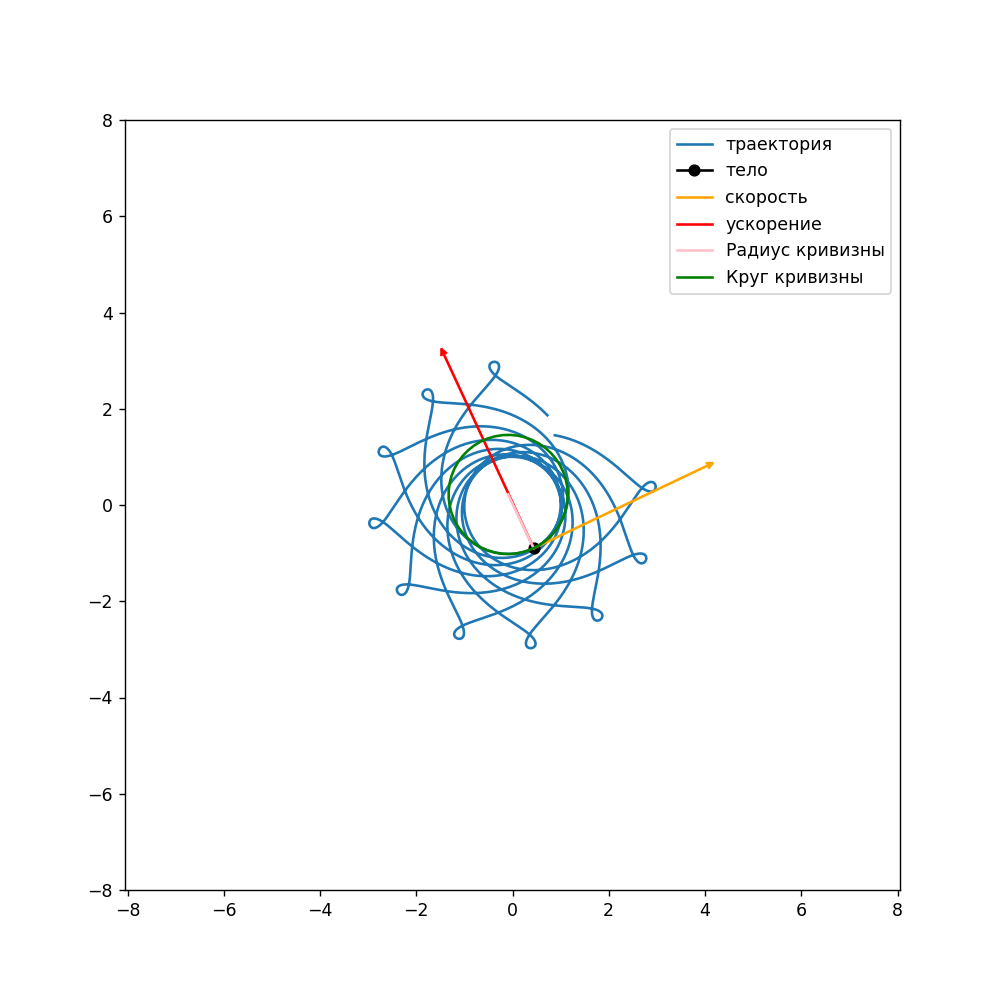

In [22]:
# Настройка холста
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.axis('equal')
ax.set(xlim=[-8, 8], ylim=[-8, 8])

ax.plot(x,y) # График траектории движения
P = ax.plot(x[0], y[0], marker='o', color='black')[0] # График (точка) тела
V_line = ax.plot([x[0], x[0]+k_V*Vx[0]], [y[0], y[0]+k_V*Vy[0]], color='orange')[0] # График прямой вектора скорости
A_line = ax.plot([x[0], x[0]+k_A*Ax[0]], [y[0], y[0]+k_A*Ay[0]], color='red')[0] # График прямой вектора ускорения
R_Line = ax.plot([x[0], x[0] + Nx[0]*R[0]], [y[0],y[0]+Ny[0]*R[0]], color='pink')[0]
angle = np.linspace(0, 6.28, 50)
Centr = ax.plot(x[0]+R[0]*Nx[0]*np.cos(angle), y[0]+R[0]*Ny[0]*np.sin(angle), color='green')[0]
plt.legend(['траектория', 'тело', 'скорость', 'ускорение', 'Радиус кривизны', 'Круг кривизны'], loc=1)
RotX, RotY = Rot2D(x_arr, y_arr, Alpha_V[0])
V_Arrow = ax.plot(x[0]+k_V*Vx[0] + RotX, y[0]+k_V*Vy[0] + RotY, color='orange')[0] # Стрелка вектора скорости
RotX, RotY = Rot2D(x_arr, y_arr, Alpha_A[0])
A_Arrow = ax.plot(x[0]+k_A*Ax[0] + RotX, y[0]+k_A*Ay[0] + RotY, color='red')[0] # Стрелка вектора ускорения

kino = animation.FuncAnimation(fig, TheMagicOfThtMovement, frames=len(ite), interval=10) # Анимация
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=800)
# kino.save('Lab1.gif', writer=writer)
kino